In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
gain1 = 6.93e-7
alpha1 = 1.7
Vgs = np.arange(0,12,0.001)
Vth1 = 0.95
Vds = 6
dibl1 = 0.07
Vt1 = Vth1-dibl1*Vds
lamda1 = 0.08

In [13]:
gain2 = 4.55*6.93e-7
alpha2 = 3.4
Vth2 = 1.2
dibl2 = 0.04
Vt2 = Vth2-dibl2*Vds
lamda2 = 0.03

In [14]:
def Ids_sub(gain,alpha,Vg,Vt,Vds):
    #Vtge = (Vt - Vg+ np.sqrt((Vt-Vg)**2+1e-30))/2
    Vtge = Vt-Vg
    print(Vtge)
    Ids = gain*(alpha-1)*(0.026)**2*np.exp((-Vtge)/(alpha*0.026))*(1-np.exp(-Vds/0.0026))
    return Ids
def Ids_at(gain,alpha,Vg,Vt,Vds,lamda):
    #Vgt = (Vg-Vt+np.sqrt((Vg-Vt)**2+1e-30))/2
    Vgt = Vg-Vt
    print(Vgt)
    Vdsat = (Vgt)/alpha
    Vdseff = Vds - 0.5*(Vds-Vdsat + np.sqrt((Vds-Vdsat)**2 + 1e-30))
    Ids = gain*alpha*(Vdsat*Vdseff - Vdseff**2/2)*(1+lamda*Vds)
    return Ids

In [15]:
Ids1_sub = Ids_sub(gain1,alpha1,Vgs,Vth1,Vds)
Ids1_at  = Ids_at(gain1,alpha1,Vgs,Vth1,Vds,lamda1)
Ids2_sub = Ids_sub(gain2,alpha2,Vgs,Vth2,Vds)
Ids2_at  = Ids_at(gain2,alpha2,Vgs,Vth2,Vds,lamda2)

[  0.95    0.949   0.948 ... -11.047 -11.048 -11.049]
[-0.95  -0.949 -0.948 ... 11.047 11.048 11.049]
[  1.2     1.199   1.198 ... -10.797 -10.798 -10.799]
[-1.2   -1.199 -1.198 ... 10.797 10.798 10.799]


In [20]:
Id_sub = (Ids1_sub*Ids2_sub)*(Ids1_sub+Ids2_sub)
Id_at = (1/Ids1_at+1/Ids2_at)**(-1)
Id = (1/Id_sub+1/Id_at)**(-1)

/var/folders/tw/pk13fzq96rq61f61zpv3x97c0000gn/T/ipykernel_6496/346188020.py:2: RuntimeWarning: divide by zero encountered in divide
  Id_at = (1/Ids1_at+1/Ids2_at)**(-1)
/var/folders/tw/pk13fzq96rq61f61zpv3x97c0000gn/T/ipykernel_6496/346188020.py:3: RuntimeWarning: divide by zero encountered in divide
  Id = (1/Id_sub+1/Id_at)**(-1)


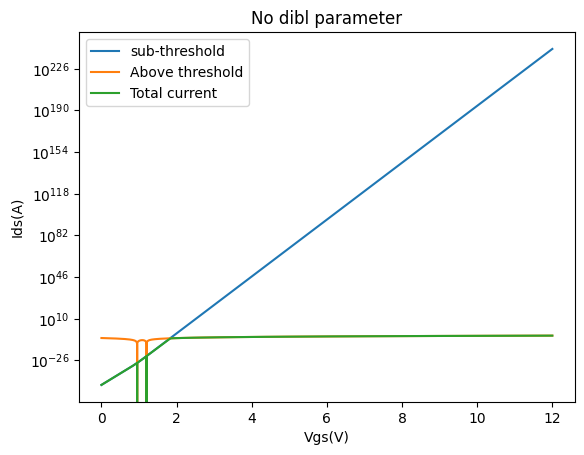

In [21]:
plt.plot(Vgs,Id_sub)
plt.plot(Vgs,Id_at)
plt.plot(Vgs,Id)
plt.legend(['sub-threshold','Above threshold','Total current'])
plt.ylabel('Ids(A)')
plt.xlabel('Vgs(V)')
plt.title('No dibl parameter')
plt.yscale('log')
plt.savefig('Nodibl.png')

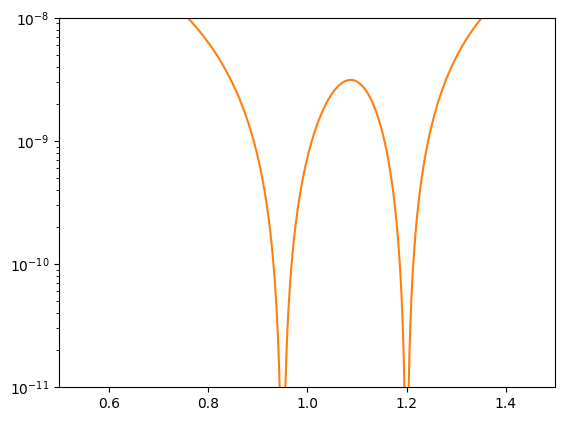

In [22]:
plt.plot(Vgs,Id_sub)
plt.plot(Vgs,Id_at)
plt.plot(Vgs,Id)
plt.ylim(1e-11,1e-8)
plt.xlim(0.5,1.5)
plt.yscale('log')
plt.show()


In [147]:
grad = np.gradient(Id)

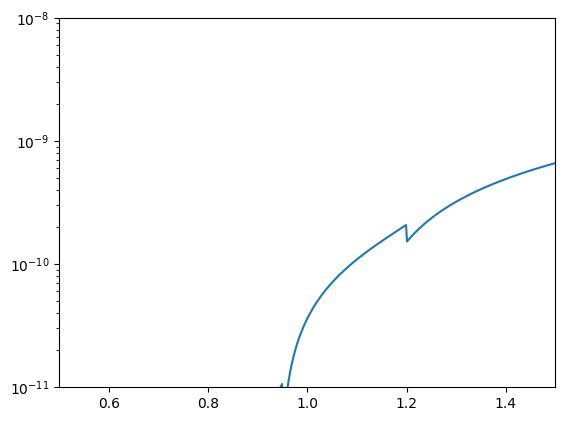

In [148]:
plt.plot(Vgs,grad)
plt.yscale('log')
plt.ylim(1e-11,1e-8)
plt.xlim(0.5,1.5)
plt.show()

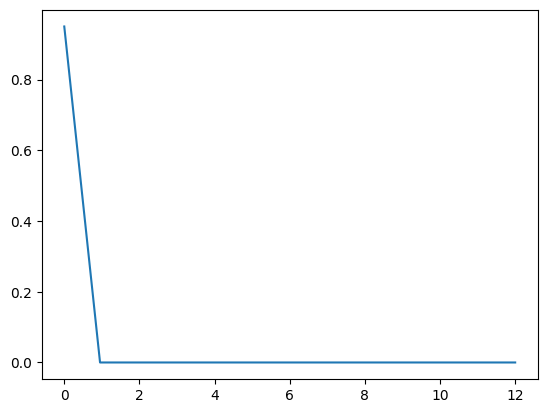

In [149]:
Vtge1 = (Vth1 - Vgs+ np.sqrt((Vth1-Vgs)**2+1e-16))/2
plt.plot(Vgs,Vtge1)
#plt.yscale('log')
#plt.ylim(1e-11,1e-8)
#plt.xlim(0.5,1.5)
plt.show()